In [1]:
import pandas as pd
import numpy as np
import gmplot

import matplotlib.pyplot as plt

import folium
from IPython.display import display

The analysis is based on data set provided by Kaggle on Boston Crime that took place from year 2015 - 2018.

The following is different analysis on SHOOTING that took place within the year 2015 - 2018

In [2]:
crime = pd.read_csv('crime.csv', encoding = 'unicode_escape')
crime['OCCURRED_ON_DATE'] = pd.to_datetime(crime['OCCURRED_ON_DATE'])
crime.index = crime['OCCURRED_ON_DATE']
crime = crime.dropna()
crime = crime[crime['SHOOTING'] == 'Y']

In the above lines of code crime.csv is file with all the records that have imported using pandas library.
Since the analysis requires extreme use of datetime column so I made the OCCURED_ON_DATE as the index which will help to toggle between dates easily.
It is the followed by dropping NA rows and filtering records with the incident which involves SHOOTING

In [3]:
crime.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 971 entries, 2018-08-29 23:19:00 to 2015-06-16 20:41:00
Data columns (total 17 columns):
INCIDENT_NUMBER        971 non-null object
OFFENSE_CODE           971 non-null int64
OFFENSE_CODE_GROUP     971 non-null object
OFFENSE_DESCRIPTION    971 non-null object
DISTRICT               971 non-null object
REPORTING_AREA         971 non-null object
SHOOTING               971 non-null object
OCCURRED_ON_DATE       971 non-null datetime64[ns]
YEAR                   971 non-null int64
MONTH                  971 non-null int64
DAY_OF_WEEK            971 non-null object
HOUR                   971 non-null int64
UCR_PART               971 non-null object
STREET                 971 non-null object
Lat                    971 non-null float64
Long                   971 non-null float64
Location               971 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(10)
memory usage: 136.5+ KB


In [4]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OCCURRED_ON_DATE,,,,,,,,,,,,,,,,,
2018-08-29 23:19:00,I182069509,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,E18,540,Y,2018-08-29 23:19:00,2018,8,Wednesday,23,Part One,HILLIS RD,42.250405,-71.131737,"(42.25040550, -71.13173740)"
2018-08-27 22:56:00,I182068876,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,B2,183,Y,2018-08-27 22:56:00,2018,8,Monday,22,Part One,DUDLEY ST,42.321042,-71.072153,"(42.32104169, -71.07215291)"
2018-08-22 15:00:00,I182067317,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part One,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
2018-08-22 15:00:00,I182067317,2662,Ballistics,BALLISTICS EVIDENCE/FOUND,B2,312,Y,2018-08-22 15:00:00,2018,8,Wednesday,15,Part Two,HOLLANDER ST,42.315689,-71.089514,"(42.31568920, -71.08951391)"
2018-08-19 22:46:00,I182066420,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A15,900,Y,2018-08-19 22:46:00,2018,8,Sunday,22,Part One,MCNULTY CT,42.378085,-71.057841,"(42.37808452, -71.05784115)"


In the above 2 cells a summary of columns in the dataset is shown. 
The first one shows the columns data types and the second one a smal description of the first 5 records

In [5]:
yearsDt        = list(pd.unique(crime['OCCURRED_ON_DATE'].dt.year))
shootingInYear = []

In [6]:
crime[crime['SHOOTING'] == 'Y'].loc['2018']
for year in yearsDt:
    print(str(year) + " -> " + str(len(crime[crime['SHOOTING'] == 'Y'].loc[str(year)])))
    shootingInYear.append(len(crime[crime['SHOOTING'] == 'Y'].loc[str(year)]))

2018 -> 169
2017 -> 357
2016 -> 267
2015 -> 178


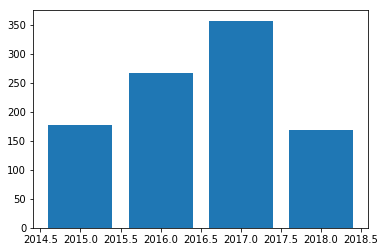

In [7]:
plt.bar(yearsDt, shootingInYear)
plt.show()

The above analysis shows the year with max shooting.
The bar graph shows that max shooting took place in the year 2017 followed by 2016. 
The key thing is notice here is that the ratio between year 2017 to 2018 or 2017 to 2016 is much greater than anyother ratio.

In [8]:
for year in yearsDt:
    print(year)
    latLong = crime.loc[str(year)][['Lat', 'Long']]
    latLong = latLong.dropna()
    latLong = latLong.values
    mapit = folium.Map( location=[42.3, -71.1], zoom_start = 10 )
    for coord in latLong:
        folium.Marker( location=[ coord[0], coord[1] ], 
                      icon=folium.Icon(color='red'), 
                      radius=10 ).add_to( mapit )
        
    display(mapit)
        

2018


2017


2016


2015


In the above cell, all the shootings in each year has been plotted in the map form. This can help to cluster shootings.
For example in the year 2017 the max shootings took place in and near the Columbia Road. 
Another thing is rare shooting that took place in a very outside of city like the one in Faneuli street in the year 2017


In [9]:
# import plotly.graph_objects as go

# mapbox_access_token = ""

# for year in yearsDt:
#     lat  = crime.loc[str(year)].head().Lat
#     long = crime.loc[str(year)].head().Long
#     fig = go.Figure(go.Scattermapbox(
#         lat=lat,
#         lon=long,
#         mode='markers',
#         marker=go.scattermapbox.Marker(
#             size=9,
#             color='red'
#         ),
#     ))

#     fig.update_layout(
#         autosize=True,
#         hovermode='closest',
#         mapbox=go.layout.Mapbox(
#             accesstoken=mapbox_access_token,
#             bearing=0,
#             center=go.layout.mapbox.Center(
#                 lat = 42.3,
#                 lon =-71.1
#             ),
#             pitch=0,
#             zoom=10
#         ),
#     )

#     fig.show()


In [10]:
monthWhenCrime = list(pd.unique(crime['OCCURRED_ON_DATE'].dt.month))
countMonth     = []

monthData      = {}

for i in range(1, 13):
    monthData[str(i)] = len(crime[crime['MONTH'] == i])
    
monthData


{'1': 58,
 '2': 46,
 '3': 38,
 '4': 69,
 '5': 70,
 '6': 121,
 '7': 127,
 '8': 104,
 '9': 78,
 '10': 80,
 '11': 68,
 '12': 112}

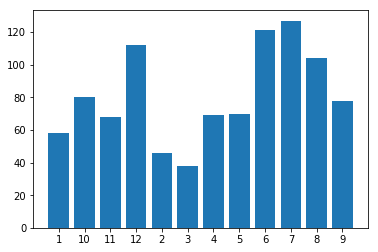

In [11]:
plt.bar(*zip(*sorted(monthData.items())))
plt.show()

The above analysis is based on most shooting as per month.
As you can see in the bar graph the 7th month i.e. July of every year combined has max shootings followed by 6th i.e. June and followed by 8th i.e August. 
This time of the year is pretty much summer in Boston and people tend to enjoy by being in the city. This could be one reason for increase in shooting than any other part of year.

In [12]:
monthWhenCrime = list(pd.unique(crime['OCCURRED_ON_DATE'].dt.month))
dt             = {}

In [13]:
for year in yearsDt:
    dt[year] = {}
    for month in range(1,13):
        curDate = str(year)+"-"+str(month)
        dt[year][month] = len(crime.loc[curDate])

In [14]:
dt

{2018: {1: 21,
  2: 13,
  3: 8,
  4: 19,
  5: 27,
  6: 34,
  7: 26,
  8: 21,
  9: 0,
  10: 0,
  11: 0,
  12: 0},
 2017: {1: 20,
  2: 21,
  3: 18,
  4: 37,
  5: 21,
  6: 41,
  7: 35,
  8: 22,
  9: 37,
  10: 36,
  11: 22,
  12: 47},
 2016: {1: 17,
  2: 12,
  3: 12,
  4: 13,
  5: 22,
  6: 34,
  7: 27,
  8: 25,
  9: 19,
  10: 29,
  11: 28,
  12: 29},
 2015: {1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 0,
  6: 12,
  7: 39,
  8: 36,
  9: 22,
  10: 15,
  11: 18,
  12: 36}}

2018


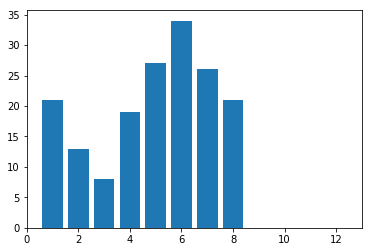

2017


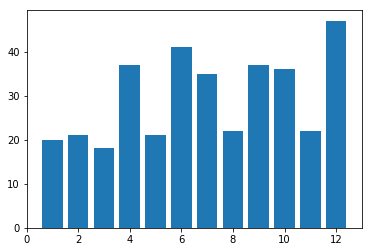

2016


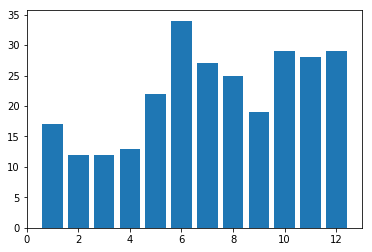

2015


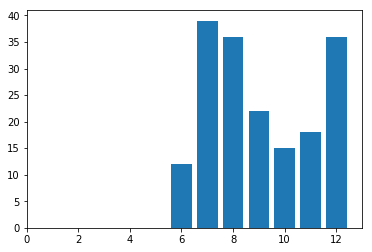

In [15]:
for key, value in dt.items():
    print(key)
    plt.bar(*zip(*sorted(value.items())))
    plt.show()

The above cells are a detailed description of which month had the maximum number of shooting as per year. The analysis shows
2018 max shooting held at 6th month i.e. June
2017 max shooting held at 12th month i.e. December
2016 max shooting held at 6th month i.e. June
2015 max shooting held at 7th month i.e. July.

This brings to a conclusion that irrespective of any year max shooting is held in the months of June and July. 
It is true that 2017 had max shooting in the month December but the second-highest was again held in the month of June i.e. 6th. This unusual behavior might be because of any or more event held in December 2017 that gave us the peak.

In [16]:
dayOfWeek = list(pd.unique(crime["DAY_OF_WEEK"]))
weekData  = {}

In [17]:
for day in dayOfWeek:
    weekData[day] = len(crime[crime["DAY_OF_WEEK"] == day])

In [18]:
weekData

{'Wednesday': 131,
 'Monday': 103,
 'Sunday': 147,
 'Tuesday': 107,
 'Saturday': 218,
 'Thursday': 126,
 'Friday': 139}

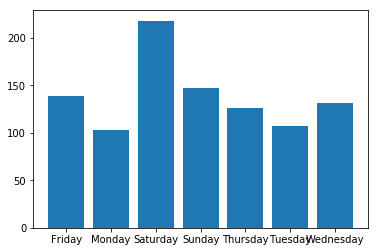

In [19]:
plt.bar(*zip(*sorted(weekData.items())))
plt.show()

To bring down analysis to more detailed segment, I have tried to show shooting as per day. The stats were pretty much as expected. The max shooting held on Saturday, this is due to the fact that people tend to go out during weekend espically on Saturdays that gave us the max shooting stats. Monday being the least because mostly everyone tend to work.

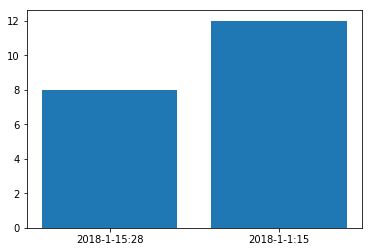

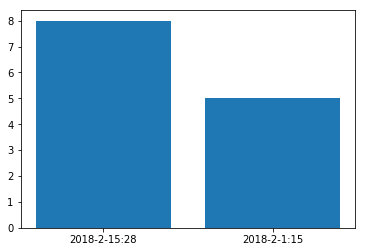

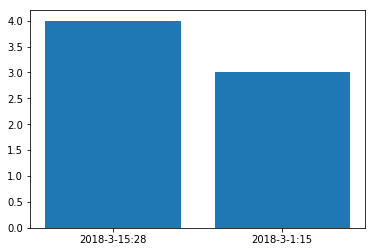

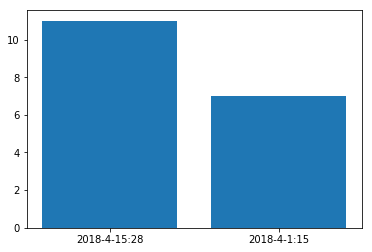

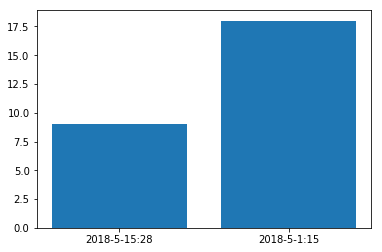

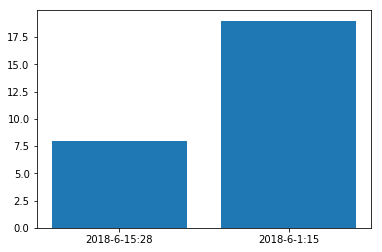

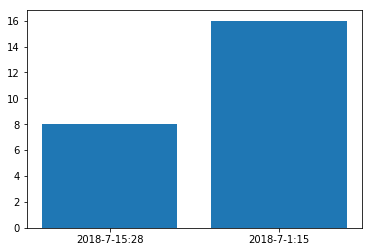

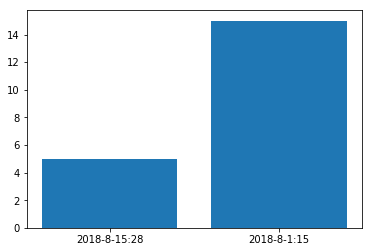

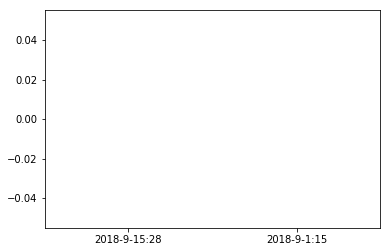

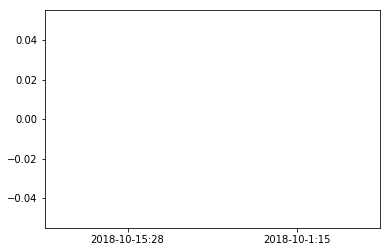

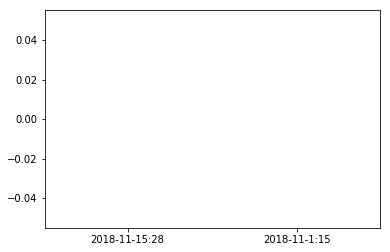

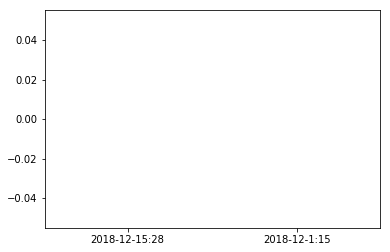

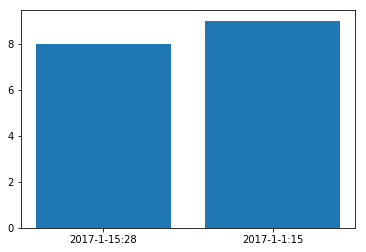

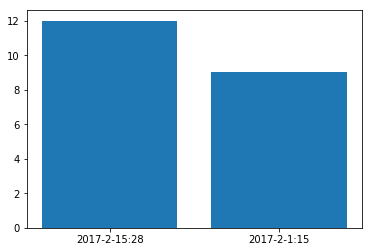

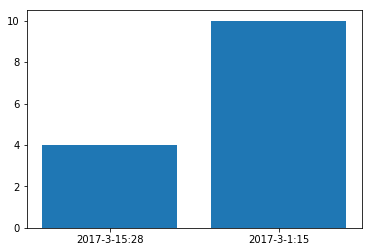

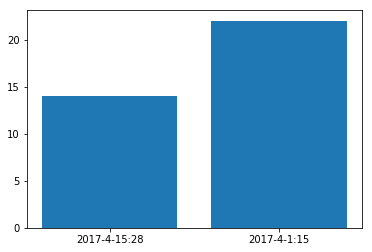

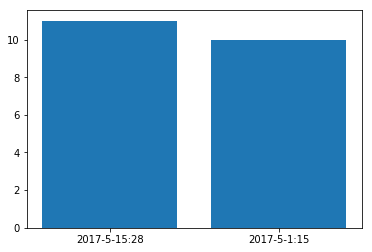

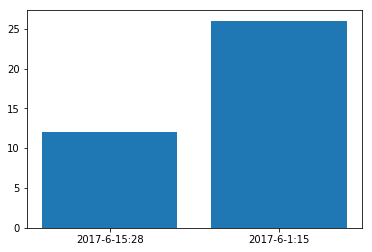

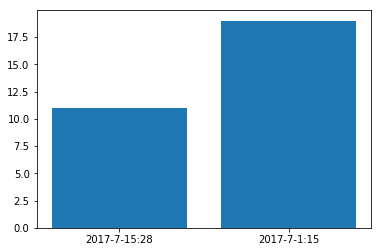

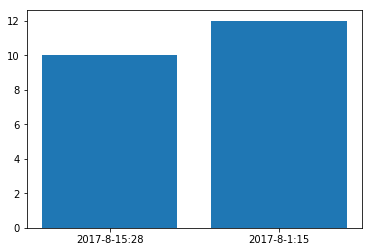

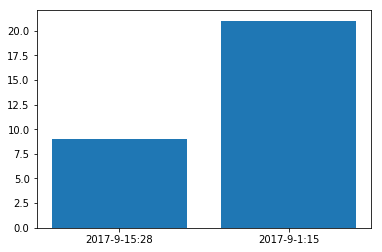

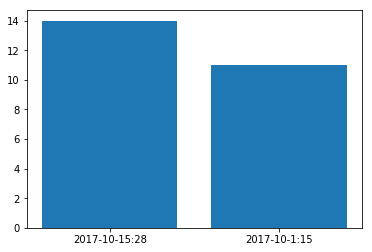

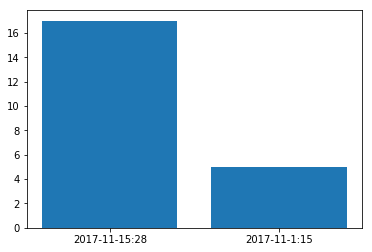

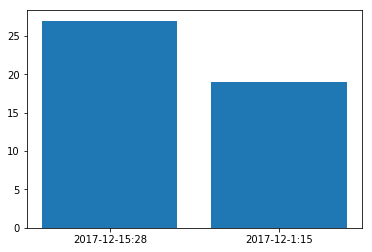

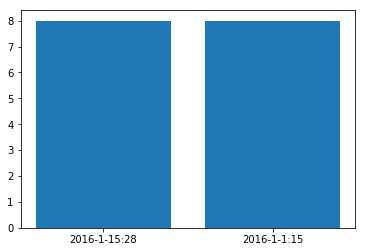

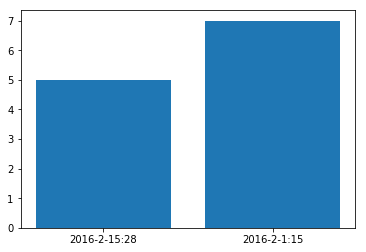

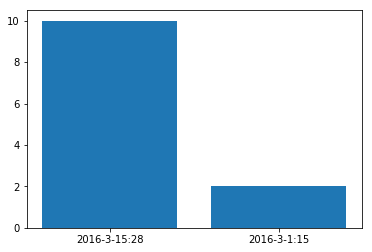

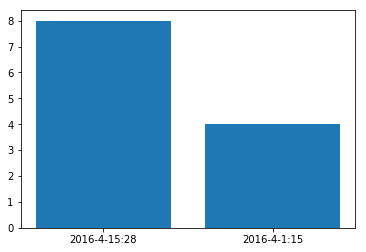

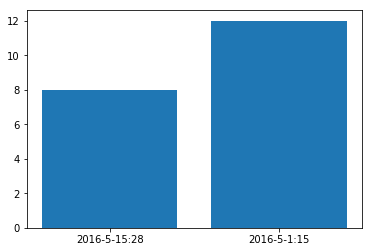

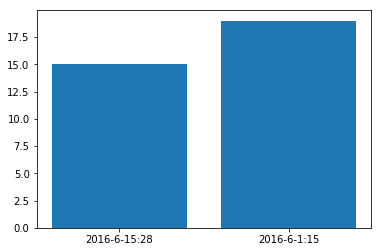

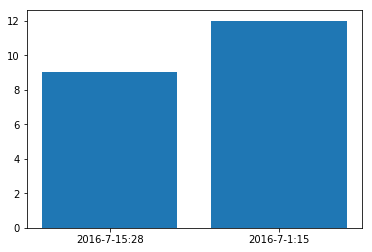

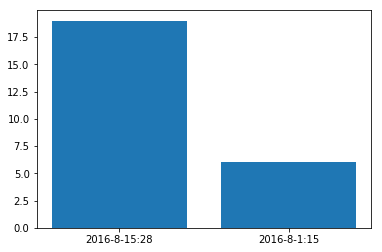

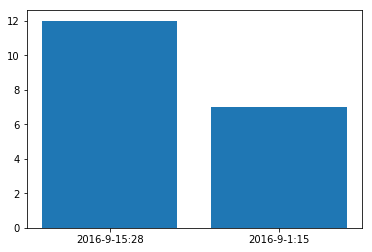

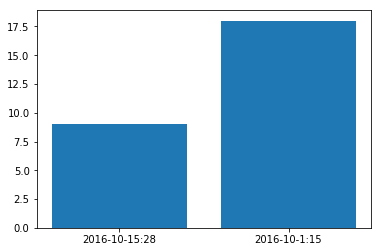

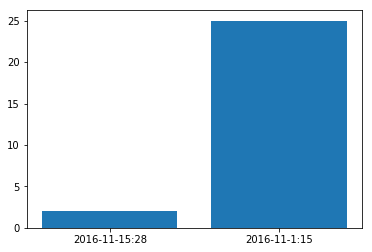

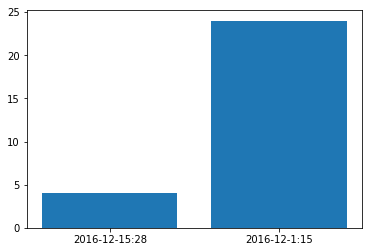

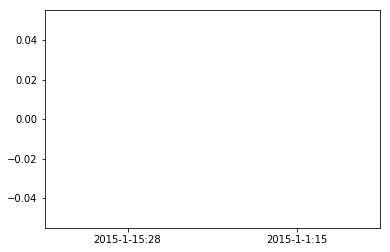

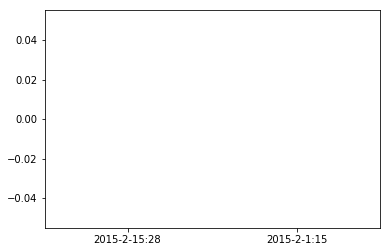

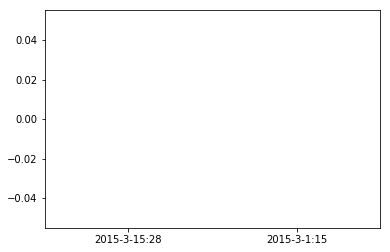

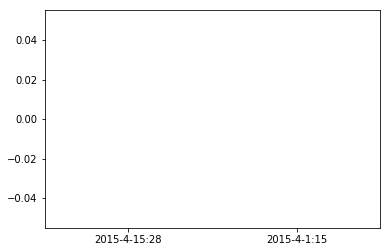

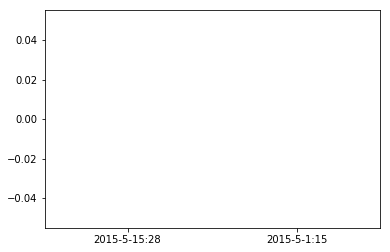

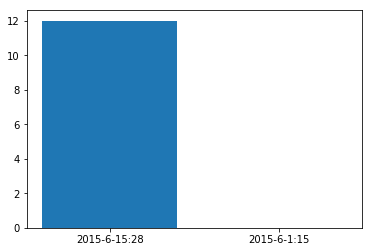

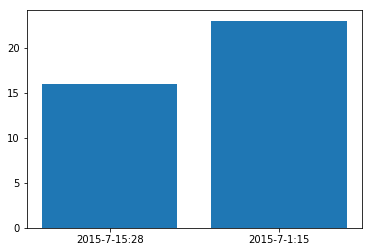

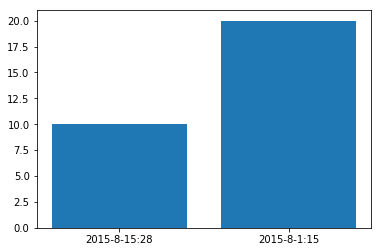

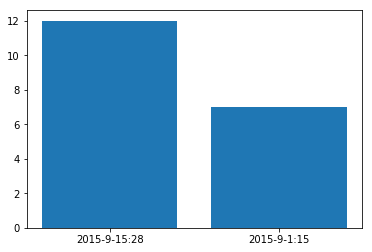

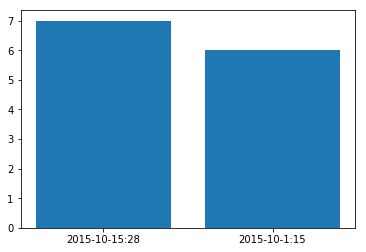

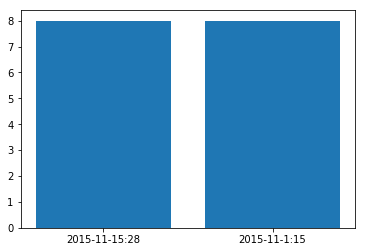

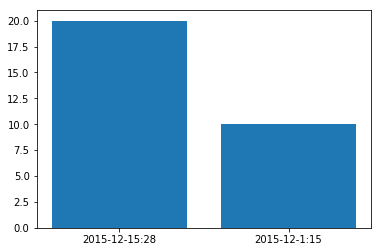

In [20]:
for year in yearsDt:
    for month in range(1, 13):
        dayBased = {}
        upperVal = str(year)+"-"+str(month)+"-"+"1"
        lowerVal = str(year)+"-"+str(month)+"-"+"15"
        dayBased[str(year) + "-" + str(month) + "-1:15" ] = len(crime.loc[upperVal:lowerVal])
        upperVal = str(year)+"-"+str(month)+"-"+"16"
        lowerVal = str(year)+"-"+str(month)+"-"+"28"
        dayBased[str(year) + "-" + str(month) + "-15:28"] = len(crime.loc[upperVal:lowerVal])
        plt.bar(*zip(*sorted(dayBased.items())))
        plt.show()

Last but not least, Which part of month had max shooting. To speak in detail its represents the shooting comparision that took place from 1 to 15 and 15 to 30 everymonth.